<a href="https://colab.research.google.com/github/MinaGe/neural-networks/blob/master/image_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
image_dim=64 #give the image a dimension&it's const. 32 or 64

In [0]:
def parse_function(filenames): #bta5od el filename w btrg3ly el sora 
    #print(filename.label) 
    image_string=tf.read_file(filenames)
    
    #don't use tf.image.decode_image, or output shape will not be defined
    image=tf.image.decode_png(image_string,channels=3 )#for RGB #watchout for the comment
    
    #this will convert to float vals. in [0,1]
    image=tf.image.convert_image_dtype(image,tf.float32)
    
    resized_image=tf.image.resize_images(image,[image_dim,image_dim])
    return resized_image #,label

In [0]:
def train_preprocess(image): #shwyt 3mlyat btt3ml 3la el sora 3shan el training
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_brightness(image,max_delta=32.0/255.0) #why?
    image = tf.image.random_saturation(image, lower=0.5,upper=1.5)
    
    #Make sure the image is still in [0,1]
    image=tf.clip_by_value(image, 0.0, 1.0)
    
    return image #,label
#shift+enter

In [0]:
def read_data(filenames):
    dataset  = tf.data.Dataset.from_tensor_slices((filenames))
    dataset  = dataset.map(parse_function)
    dataset  = dataset.map(train_preprocess)
    iterator = dataset.make_one_shot_iterator()
    return iterator
#shift+enter

In [0]:
def build_training(filenames):
    X=np.zeros((len(filenames),image_dim,image_dim,3))
    iterator =read_data(filenames)
    next_element = iterator.get_next()
    with tf.Session() as sess:
        for i in range(len(filenames)):
            image_example=sess.run(next_element)
            X[i,:,:]=image_example[:,:,:]
    return X
#shift+enter

In [30]:
#import tensorflow as tf #we've already done that before so it's optional :)
filenames=['A_1.jpg','A_2.jpg','A_3.jpg','A_4.jpg','A_5.jpg','A_6.jpg','A_7.jpg','A_8.jpg','A_9.jpg','A_10.jpg',
          'B_1.jpg','B_2.jpg','B_3.jpg','B_4.jpg','B_5.jpg','B_6.jpg','B_7.jpg','B_8.jpg','B_9.jpg','B_10.jpg',
          'C_1.jpg','C_2.jpg','C_3.jpg','C_4.jpg','C_5.jpg','C_6.jpg','C_7.jpg','C_8.jpg','C_9.jpg','C_10.jpg',
          'D_1.jpg','D_2.jpg','D_3.jpg','D_4.jpg','D_5.jpg','D_6.jpg','D_7.jpg','D_8.jpg','D_9.jpg','D_10.jpg',
          'E_1.jpg','E_2.jpg','E_3.jpg','E_4.jpg','E_5.jpg','E_6.jpg','E_7.jpg','E_8.jpg','E_9.jpg','E_10.jpg',
          'F_1.jpg','F_2.jpg','F_3.jpg','F_4.jpg','F_5.jpg','F_6.jpg','F_7.jpg','F_8.jpg','F_9.jpg','F_10.jpg',
          'G_1.jpg','G_2.jpg','G_3.jpg','G_4.jpg','G_5.jpg','G_6.jpg','G_7.jpg','G_8.jpg','G_9.jpg','G_10.jpg',
          'H_1.jpg','H_2.jpg','H_3.jpg','H_4.jpg','H_5.jpg','H_6.jpg','H_7.jpg','H_8.jpg','H_9.jpg','H_10.jpg',
          'I_1.jpg','I_2.jpg','I_3.jpg','I_4.jpg','I_5.jpg','I_6.jpg','I_7.jpg','I_8.jpg','I_9.jpg','I_10.jpg',
          'J_1.jpg','J_2.jpg','J_3.jpg','J_4.jpg','J_5.jpg','J_6.jpg','J_7.jpg','J_8.jpg','J_9.jpg','J_10.jpg']#enter filenames of imgs
Y=np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41
           ,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80
           ,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99])
X=build_training(filenames)

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(), #btrg3haly msfofa f bo3d wa7d
    tf.keras.layers.Dense(image_dim*image_dim*3,activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.7), #optional h5tr3 rqm random msln 0.7 w ana mdelo rqm w yrg3 yshof yqarn bl rqm elly mdeholo lw tl3 2kbr mno yrg3 blneuron w lw 2s8r hyrg3 b zero
    tf.keras.layers.Dense(100,activation=tf.nn.softmax) #number of classes,act func of classification
])

model.compile(optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.01) 
              ,loss='sparse_categorical_crossentropy',  metrics=['accuracy'])

model.fit(X, Y, epochs=1000,batch_size=100) #between 1000 & 10000
                              
model.summary()                              

model.evaluate(X,Y)

Epoch 1/1000
100/100 [==============================] - 3s 34ms/step - loss: 4.7881 - acc: 0.0000e+00
Epoch 2/1000
100/100 [==============================] - 1s 15ms/step - loss: 4.6130 - acc: 0.0000e+00
Epoch 3/1000
100/100 [==============================] - 1s 14ms/step - loss: 4.5760 - acc: 0.0100
Epoch 4/1000
100/100 [==============================] - 1s 14ms/step - loss: 4.5600 - acc: 0.0100
Epoch 5/1000
100/100 [==============================] - 1s 14ms/step - loss: 4.5484 - acc: 0.0100
Epoch 6/1000
100/100 [==============================] - 1s 14ms/step - loss: 4.5383 - acc: 0.0100
Epoch 7/1000
100/100 [==============================] - 1s 14ms/step - loss: 4.5293 - acc: 0.0300
Epoch 8/1000
100/100 [==============================] - 1s 15ms/step - loss: 4.5207 - acc: 0.0400
Epoch 9/1000
100/100 [==============================] - 1s 14ms/step - loss: 4.5125 - acc: 0.0400
Epoch 10/1000
100/100 [==============================] - 1s 14ms/step - loss: 4.5050 - acc: 0.0400
Epoch 11/10

[0.570115373134613, 1.0]

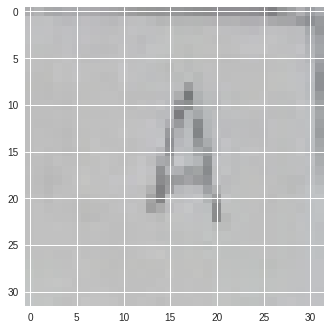

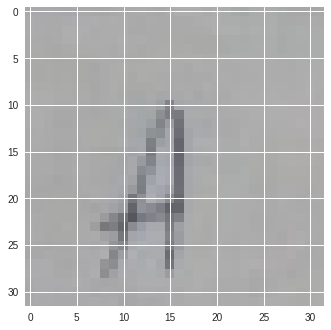

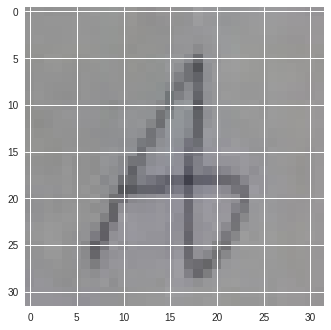

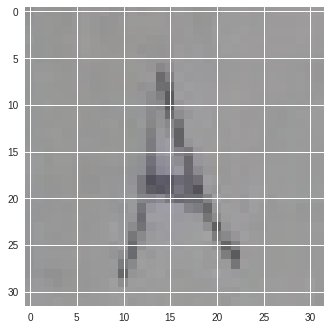

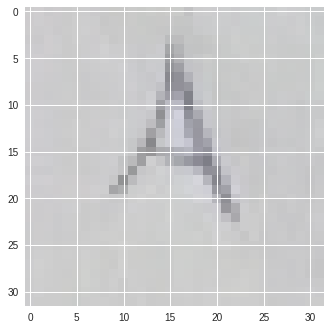

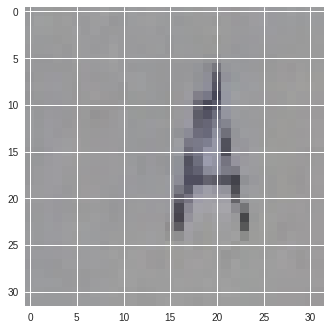

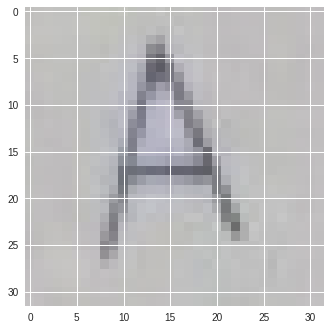

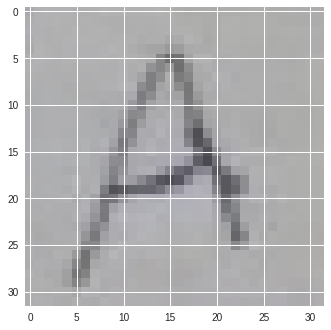

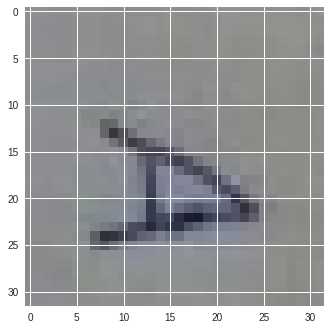

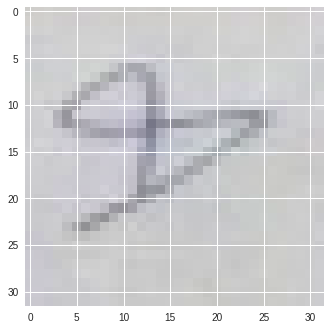

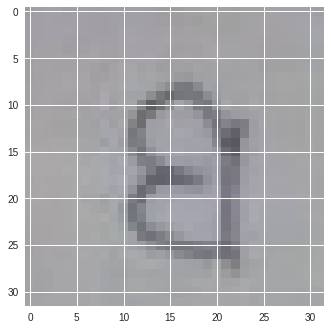

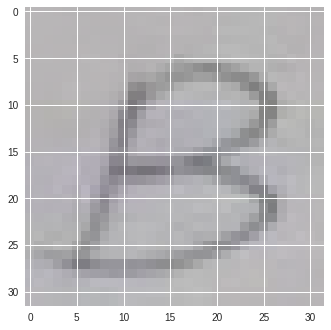

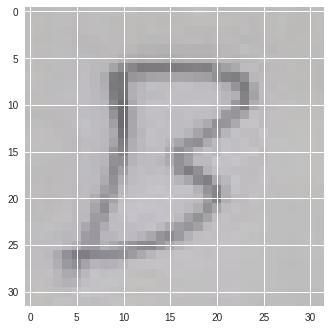

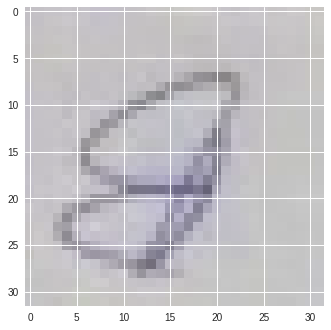

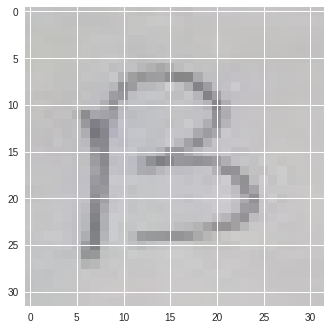

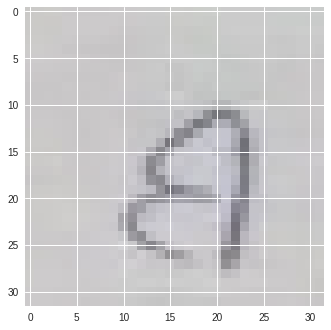

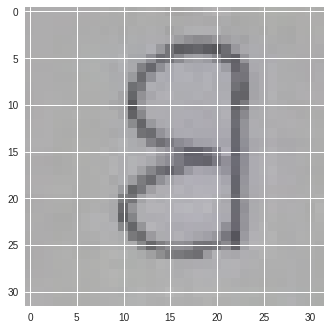

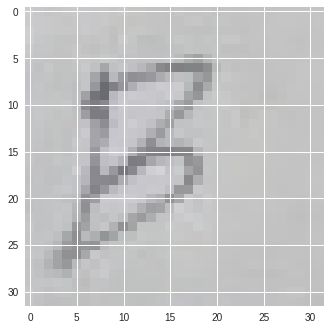

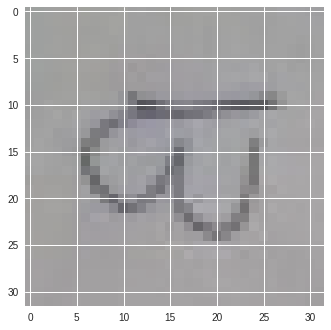

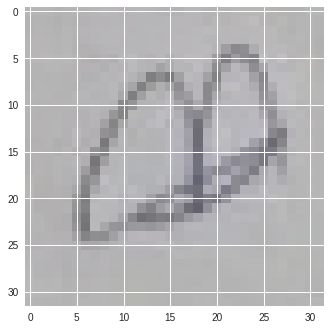

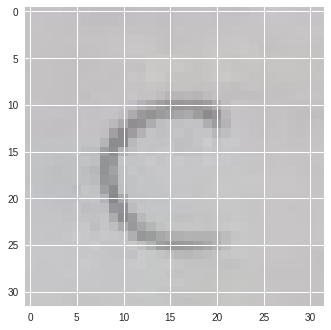

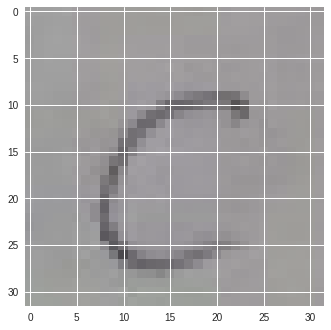

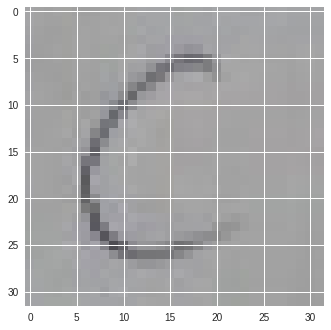

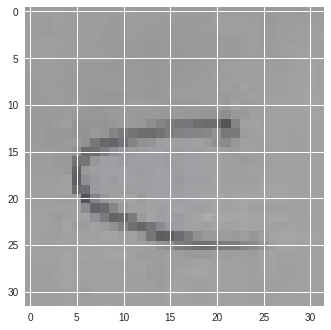

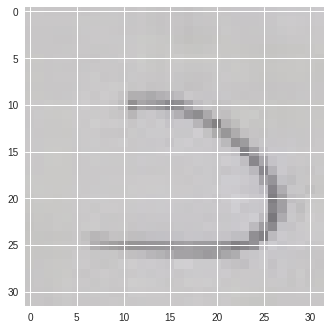

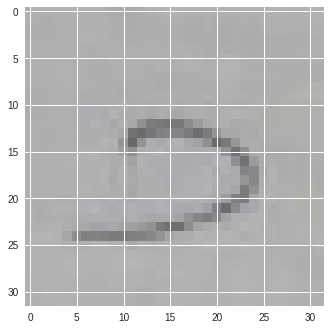

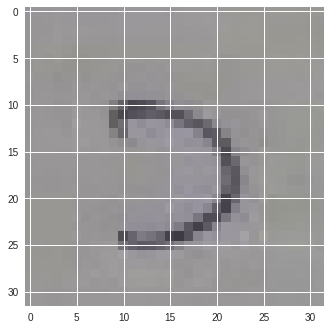

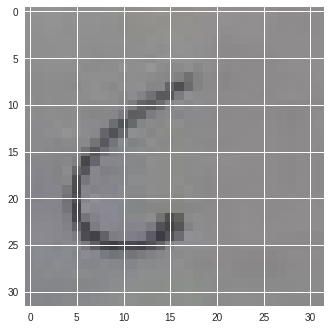

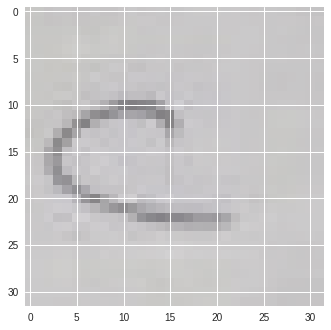

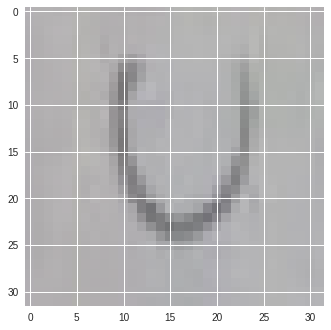

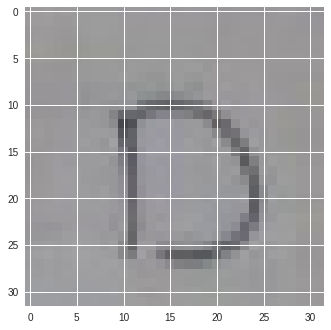

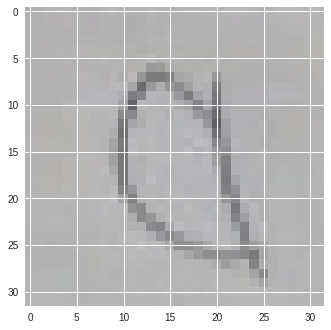

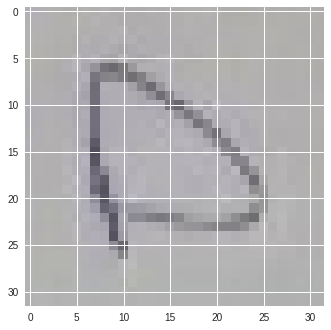

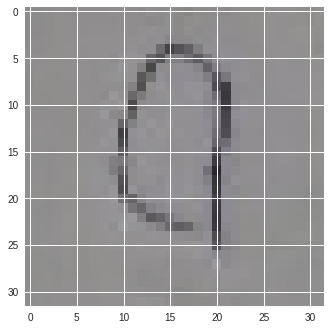

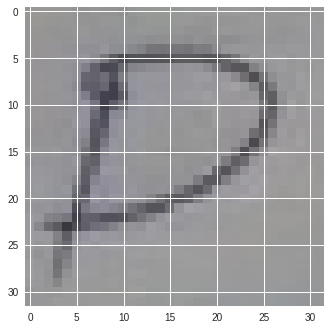

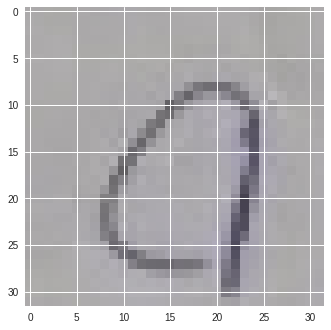

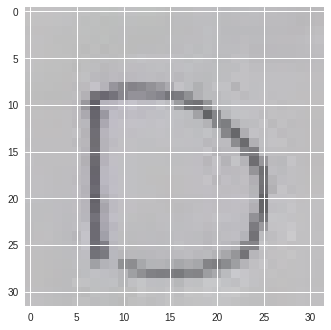

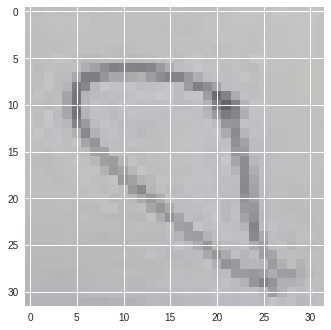

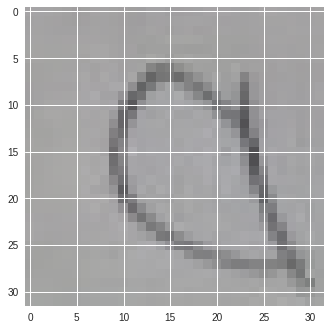

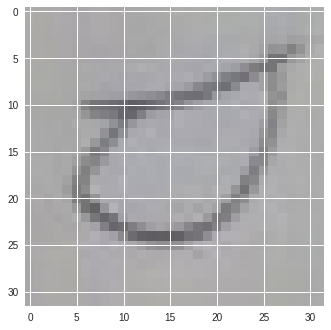

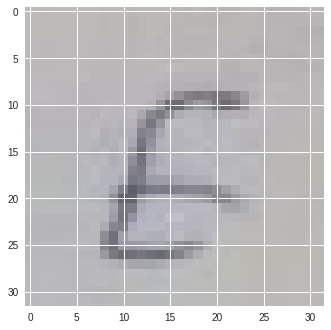

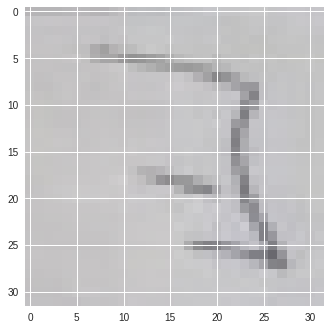

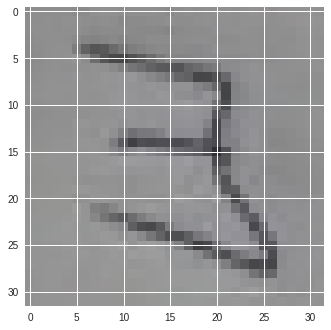

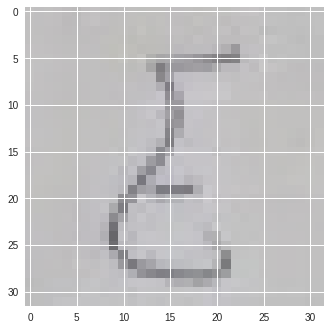

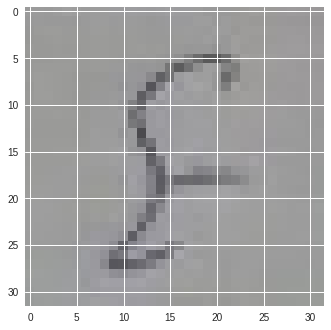

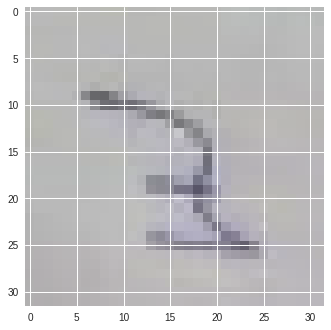

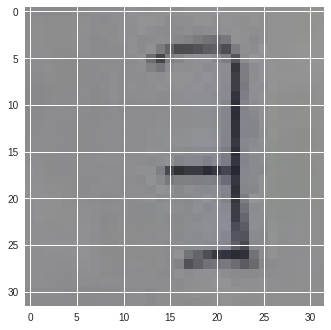

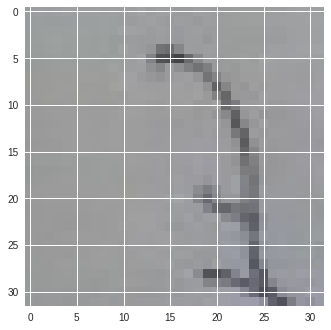

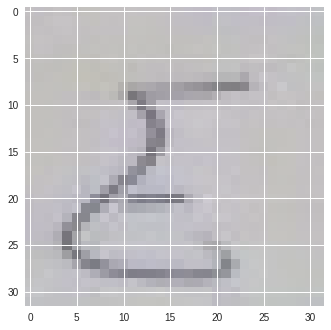

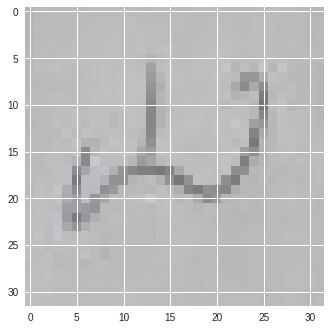

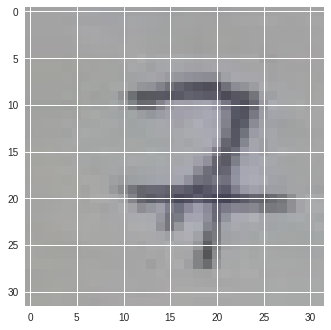

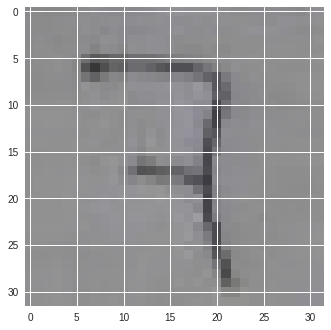

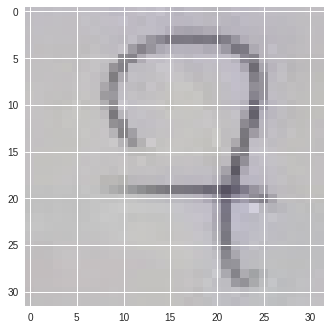

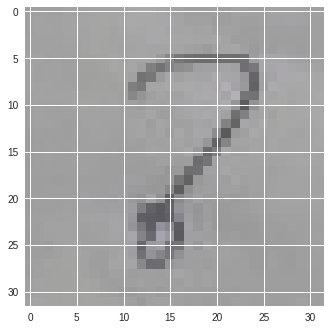

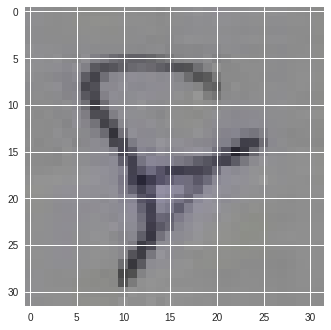

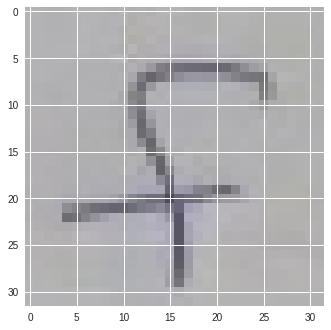

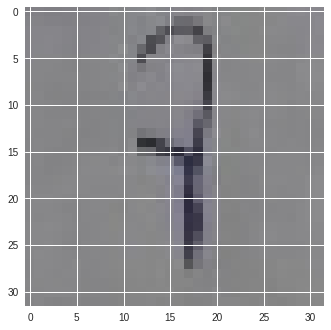

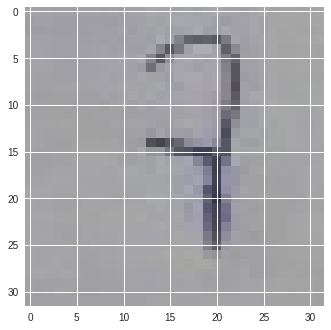

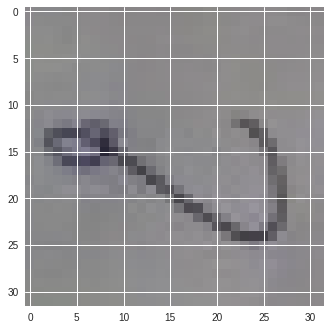

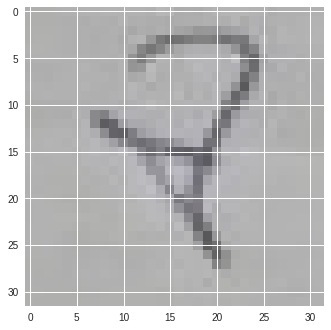

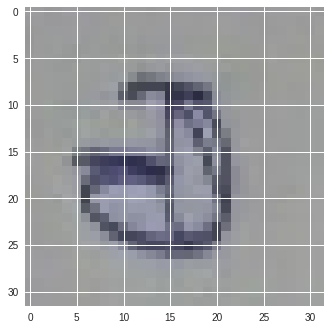

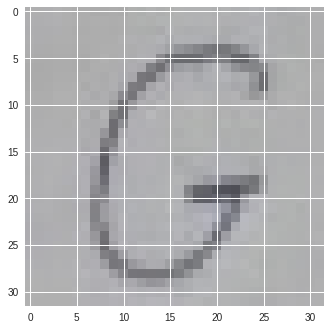

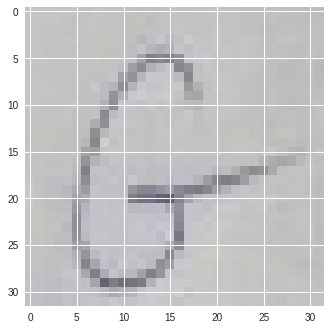

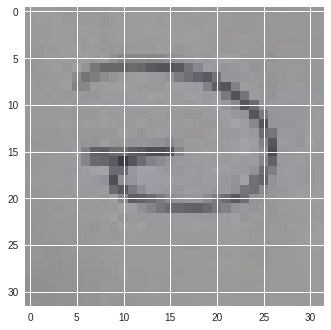

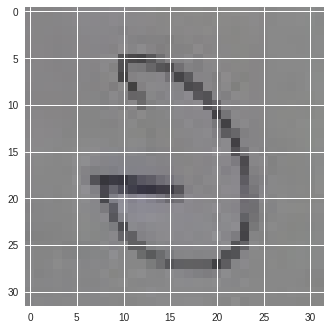

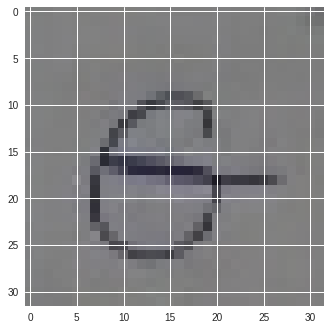

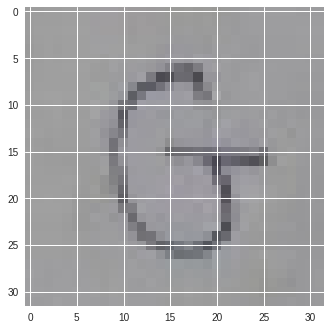

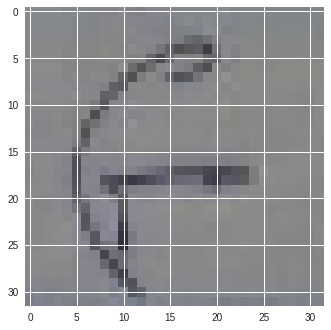

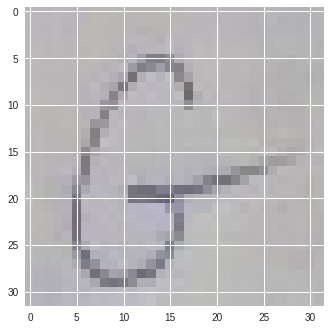

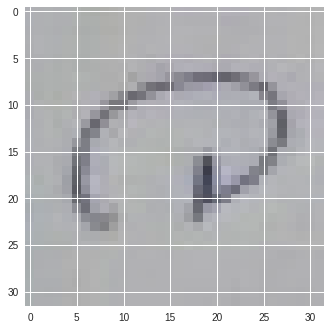

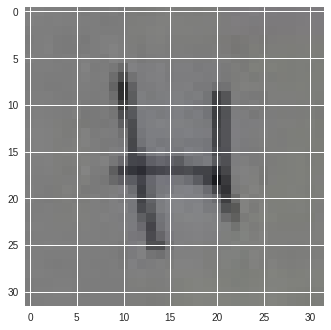

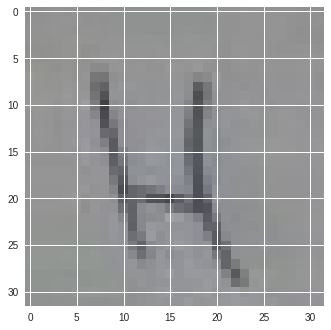

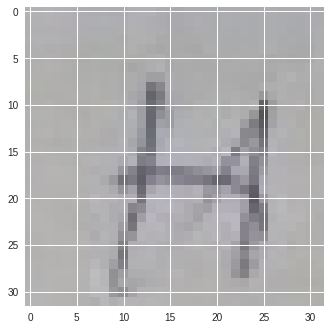

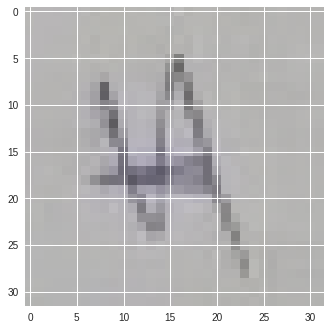

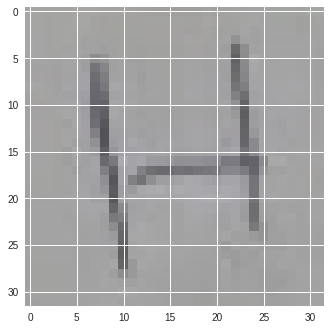

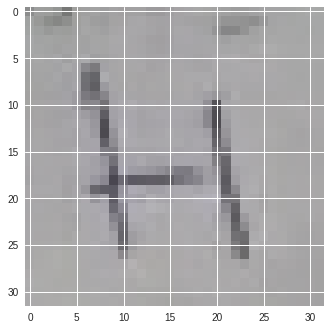

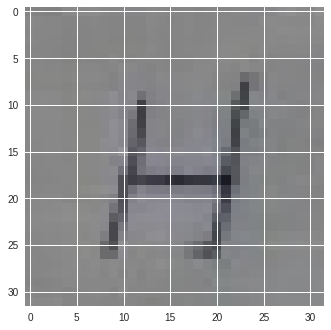

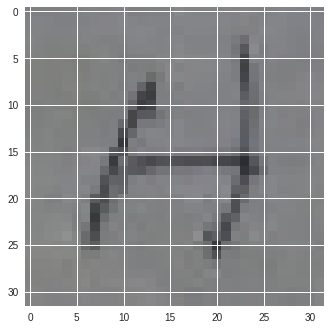

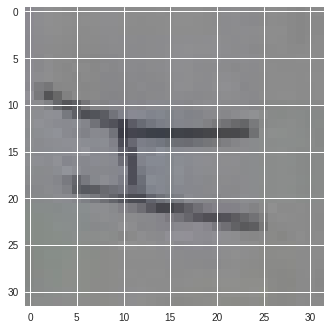

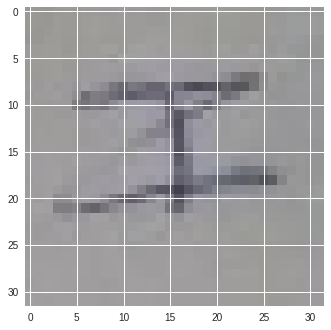

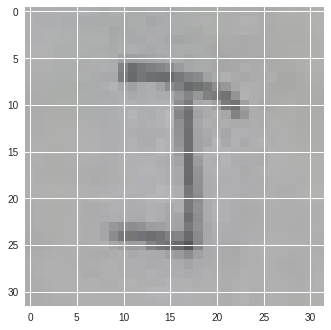

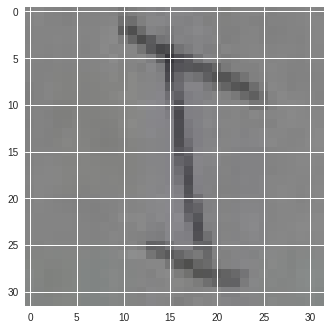

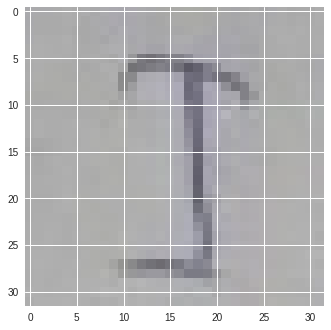

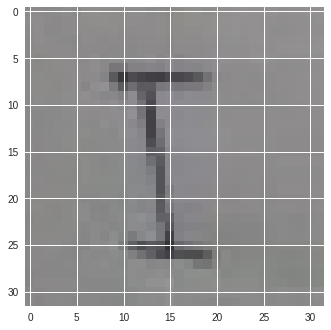

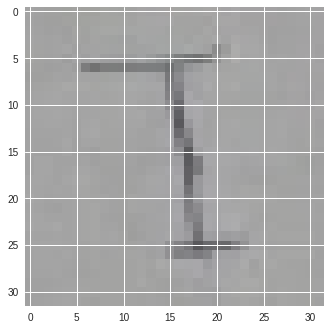

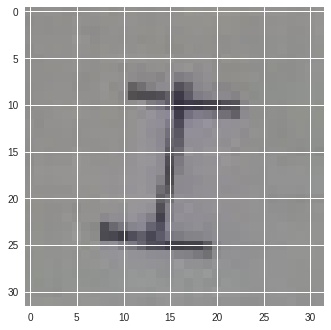

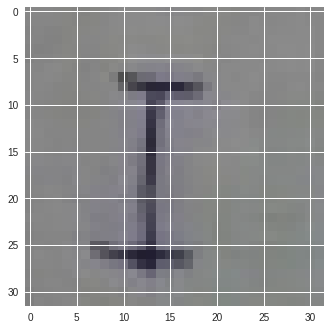

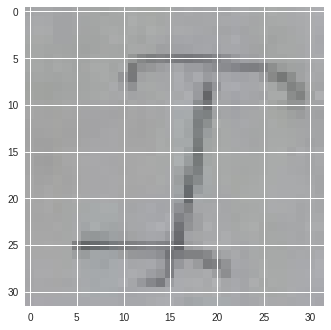

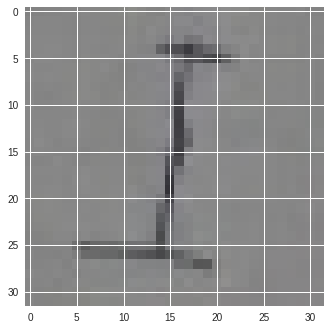

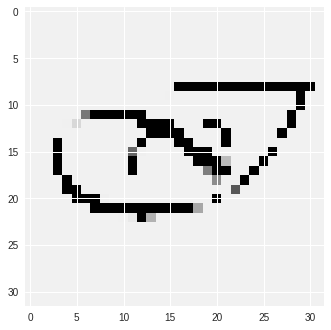

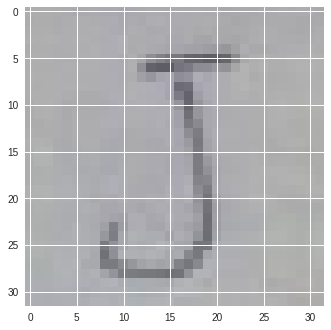

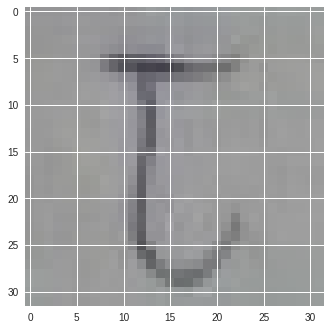

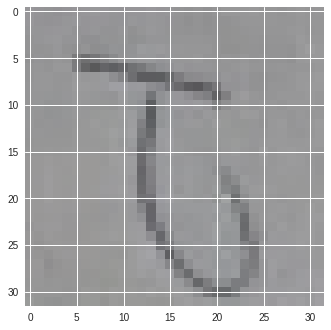

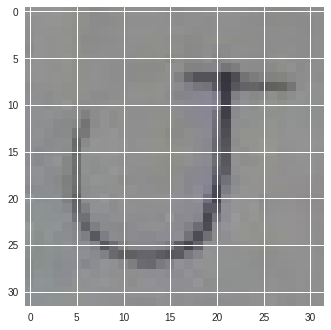

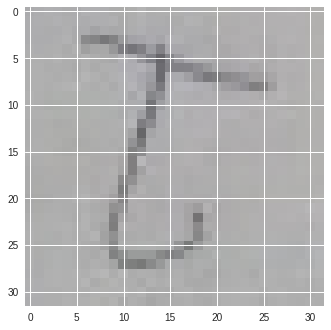

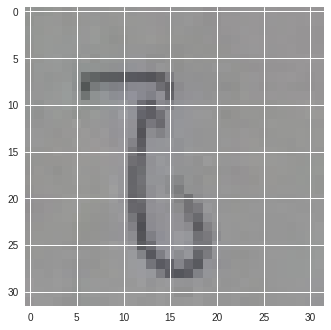

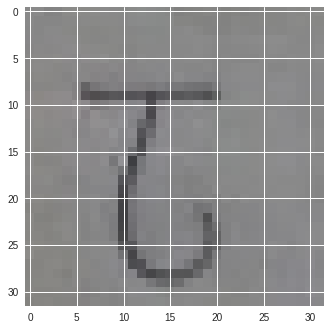

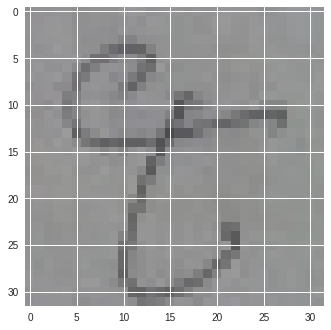

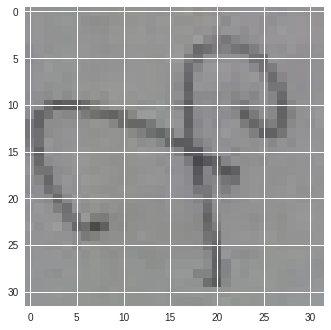

In [24]:
for i in range(99):
  plt.figure()
  plt.imshow(X[i])
  plt.grid(True)